<a href="https://colab.research.google.com/github/hajonghyun/installPytorch_study/blob/main/2_torch_grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---


# 2. 딥러닝을 가능케 한 autograd

In [1]:
import torch
import numpy as np

In [2]:
x= torch.tensor([1.],requires_grad=True) # float이어야해서 1.
# 실수의 연속성이 있어야 미분가능
print(x)

tensor([1.], requires_grad=True)


In [3]:
x = torch.tensor([1.])
print(x)
print(x.requires_grad)

x.requires_grad = True
print(x)
print(x.requires_grad)

tensor([1.])
False
tensor([1.], requires_grad=True)
True




---


# PyTorch AutoGrad의 수학적 해석



## 1. 수식 정의
* **함수:** $y = f(x) = x^2$
* **도함수:** $f'(x) = \frac{dy}{dx} = 2x$
* **목표:** $x=1$일 때의 **미분계수(Differential Coefficient)** $f'(1)$ 산출

## 2. 코드 라인별 상세 분석

### ① 독립변수 선언
```python
x = torch.tensor([1.], requires_grad=True)
```
* **의미:** 미분하고자 하는 **독립변수(Independent Variable) $x$**를 정의합니다.
* **값:** $x = 1.0$

### ② 순전파 (Forward Pass)
```python
y = x**2
```
* **의미:** $x$에 종속되는 **종속변수(Dependent Variable) $y$**를 정의하고 함수값을 계산합니다.
* **연산:** $y = 1^2 = 1.0$

### ③ 역전파 (Backward Pass)
```python
y.backward()
```
* **의미:** 연쇄 법칙(Chain Rule)을 통해 도함수를 유도하고, $x$값을 대입하여 **미분계수**를 계산합니다.
* **연산 과정:**
    $$ \frac{dy}{dx} = 2x \quad \xrightarrow{x=1} \quad 2(1) = 2 $$
* **동작:** 계산된 스칼라 값 $2.0$을 `x.grad` 메모리 공간에 저장합니다.

### ④ 결과 확인
```python
print(x.grad)
```
* **의미:** $x=1$ 지점에서의 **Gradient(미분계수)**를 출력합니다.
* **결과:** `tensor([2.])`

In [4]:
x=torch.tensor([1.],requires_grad=True)
y=x**2
print(y) # PowBackward가 붙음.

print(x.grad)
y.backward() # requires_grad가 True인 변수에 대해 (x=1.)미분계수를 구해줘.
print(x.grad)


tensor([1.], grad_fn=<PowBackward0>)
None
tensor([2.])


# y.backward()의 수학적 정의

결론적으로 `y.backward()`는 **$x=1$ 지점에서의 미분계수(Differential Coefficient)를 수치적으로 계산하는 과정**이 맞습니다.

## 상세 비교

### 1. 도함수 vs 미분계수
* **도함수 (Derivative Function):** $f'(x) = 2x$ (함수 꼴)
* **미분계수 (Differential Coefficient):** $f'(1) = 2$ (특정 지점의 값)

> **`y.backward()`는 도함수($2x$)를 출력하는 것이 아니라, 미분계수($2$)를 계산하여 저장합니다.**

### 2. 실행 과정의 수학적 의미
`y.backward()`를 실행하는 순간, 내부적으로 **연쇄 법칙(Chain Rule)**이 작동하며 아래 연산이 수행됩니다.

1.  **Forward 당시 저장된 값 확인:** $x = 1$
2.  **미분 연산 수행:** $\frac{dy}{dx} = 2 \times (\text{current } x)$
3.  **값 대입(Substitution):** $2 \times 1 = 2$
4.  **결과 저장:** `x.grad`에 $2$ 저장

## 요약
* 만약 `x`가 `torch.tensor([3.])`이었다면, `backward()`는 $x=3$에서의 미분계수인 **6**을 계산했을 것입니다.
* 따라서 `backward()`는 **"현재 텐서가 위치한 지점(Point)에서의 순간 변화율(Gradient)을 계산하는 함수"**라고 정의할 수 있습니다.



---



In [5]:
# 다른 예제
x = torch.tensor([1.],requires_grad=True)
y=x**2
print(y)
y.retain_grad() # 이걸 하면 y.grad도 볼 수 있다.
# x의 requires_grad를 y에서 계속해서 유지한다고 생각하기 (y역시도 leaf tensor로 취급해줌!)
z=3*y
print(z)

z.backward()
print(x.grad)
print(y.grad)

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])
tensor([3.])


In [6]:
# 다른 예제
x = torch.tensor([1.],requires_grad=True)
y = x**3
z = 3*y

y.backward() # 이렇게 하면 y에서부터 뒤로 넘어감.
print(x.grad)

tensor([3.])


In [7]:
# 다른 예제
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(y)
z = y+1
print(z) # AddBackward 붙어있음.
w= z**2
print(w)

w.backward()
print(x.grad)

tensor([1.], grad_fn=<PowBackward0>)
tensor([2.], grad_fn=<AddBackward0>)
tensor([4.], grad_fn=<PowBackward0>)
tensor([8.])


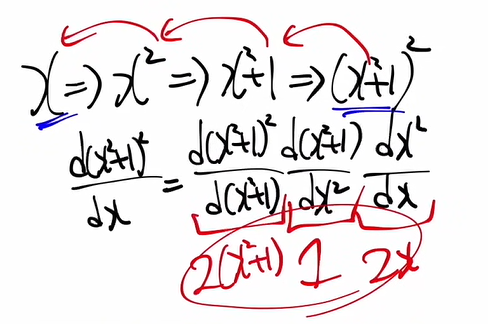

In [8]:
# 다른 예제: 편미분
x = torch.tensor([1.],requires_grad=True)
y = torch.tensor([1.],requires_grad=True)
z = 2*x**2 + y**2
print(z)

z.backward()
print(x.grad)
print(y.grad)

tensor([3.], grad_fn=<AddBackward0>)
tensor([4.])
tensor([2.])


In [9]:
# 다른 예제: 편미분
x = torch.tensor([1.],requires_grad=True)
y = torch.tensor([1.],requires_grad=True)
z = y*x**2
print(z)

z.backward()
print(x.grad)
print(y.grad)

tensor([1.], grad_fn=<MulBackward0>)
tensor([2.])
tensor([1.])


In [10]:
# 다른 예제: 벡터가 독립변수
import torch

x = torch.tensor([1.,2.,3.],requires_grad=True)
y = torch.sum(x**2)  # x1**2 + x2**2 + x3**2
print(y)

y.backward()
print(x.grad)

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


# 전이 학습 (Transfer Learning) 입문

## 1. 한 줄 요약
**"남이 공부한 족보(Pre-trained Model)를 가져와서, 내가 칠 시험 범위(My Task)만 빠르게 공부하는 것."**

## 2. 핵심 과정
1.  **가져오기:** 대기업(Google, Meta)이 엄청난 데이터로 학습시킨 '똑똑한 모델'을 다운로드.
2.  **얼리기 (Freezing):** 모델의 앞부분(이미지 보는 눈, 언어 이해력)은 이미 완벽하므로 건드리지 않게 잠금. (`requires_grad = False`)
3.  **바꾸기:** 모델의 맨 끝부분(출력층)을 내 문제(군부대 마크 분류 등)에 맞게 교체.
4.  **재학습 (Fine-tuning):** 새로 교체한 끝부분만 내 데이터로 살짝 공부시킴.

## 3. 효과
* 데이터가 적어도(100장 내외) 성능이 엄청 좋게 나옴.
* 학습 시간이 며칠 걸릴 게 몇 분으로 단축됨.

In [11]:
# 전이학습할 때 사용되는 기법
x = torch.tensor([1.],requires_grad=True)
x.requires_grad = False
# transfer learning 할 때 필요
y=x**2
print(y)
# y.backward() # error!

tensor([1.])


In [12]:
# detach
x=torch.tensor([2.],requires_grad=True)
x2 = x.detach()
print(x)
print(x2)

print("===========")

y = x**2
y2 = x2**2

print(y)
print(y2)

tensor([2.], requires_grad=True)
tensor([2.])
tensor([4.], grad_fn=<PowBackward0>)
tensor([4.])


In [13]:
# detach의 사용 용도
x = torch.tensor([1.],requires_grad=True)
y = x**2
z = y.detach() # x로 만든 것을 상수로 사용하고 싶을 때. y.requires_grad=False 이런식으로 중간에 상수로 바꿀 수는 없다.
w = y+z
print(w)

w.backward()
print(x.grad)

tensor([2.], grad_fn=<AddBackward0>)
tensor([2.])


### with torch.no_grad()
모델을 **학습(Train)**시킬 때가 아니라 **평가(Evaluation)**하거나 **실제 서비스(Inference)**할 때 필수입니다.

```python
model.eval() # 모델을 평가 모드로 전환 (Dropout 등 끔)

with torch.no_grad(): # 미분 기록 중지 (메모리 절약, 속도 향상)
    outputs = model(test_inputs)
    # 여기서 나온 outputs는 미분이 안 되는 단순 값들입니다.

In [14]:
# 많이 쓰이는 torch.no_grad
x = torch.tensor([1.],requires_grad=True)
# chain rule을 위해 계속 grad_fn을 update 하니까 grad_fn을 잠시 계산하지 않고 싶을 때 torch.no_grad
# 모델 테스트 시에는 불필요하게 메모리를 쓸 필요가 없기 때문.

with torch.no_grad():
    y = x**2
    print(x) # x는 여전히 grad_fn 있음
    print(y) # with안에서 계산되는 애(y)는 grad_fn이 안붙는다
print(x)
y = x**2
print(y)
y.backward()
print(x.grad)

tensor([1.], requires_grad=True)
tensor([1.])
tensor([1.], requires_grad=True)
tensor([1.], grad_fn=<PowBackward0>)
tensor([2.])
